In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

In [2]:
#Loading dataset
df = pd.read_csv('H:\Downloads\cubic_zirconia.csv')

In [3]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [4]:
df.tail(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26957,26958,2.09,Premium,H,SI2,60.6,59.0,8.27,8.22,5.00,17805
26958,26959,1.37,Premium,E,SI2,61.0,57.0,7.25,7.19,4.40,6751
26959,26960,1.05,Very Good,E,SI2,63.2,59.0,6.43,6.36,4.04,4281
26960,26961,1.10,Very Good,D,SI2,NaN,63.0,6.76,6.69,3.94,4361
26961,26962,0.25,Premium,F,VVS2,62.0,59.0,4.04,3.99,2.49,740
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [6]:
#since Unnamed is just the serial number we can drop it.
df = df.drop('Unnamed: 0',axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [8]:
#there are 34 duplicates in our dataset
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 34


In [9]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [10]:
#depth is having some missing values. lets fill missing values with mean
df['depth'] = df['depth'].fillna(df['depth'].median())

In [11]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [12]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  26967 
no. of columns:  10


In [13]:
df.cut.value_counts()

Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64

In [14]:
df.color.value_counts()

G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64

In [15]:
df.clarity.value_counts()

SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64

### lets look for any zero values in our data

In [16]:
df[df['carat']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [17]:
df[df['depth']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [18]:
df[df['table']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [19]:
df[df['x']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [20]:
df[df['y']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [21]:
df[df['z']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [22]:
df[df['price']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price


### There are some zero values in x,y,z columns, which are the length, width, height values of the cubic zirconia in mm. This data must be unavailable thats why they are filled as zero. 

In [23]:
df = df[df['x'] != 0]
df = df[df['y'] != 0]
df = df[df['z'] != 0]

In [24]:
df = df.drop_duplicates()

In [25]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [26]:
df.describe()

,carat,depth,table,x,y,z,price
count,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000
mean,0.797821,61.746982,57.455305,5.729385,5.733152,3.538820,3936.249991
std,0.477085,1.393457,2.231327,1.126081,1.163820,0.717483,4020.983187
min,0.200000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2373.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5353.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


## Visualization

## visualizing categorical data

In [ ]:
sns.boxplot

<AxesSubplot:xlabel='cut', ylabel='count'>

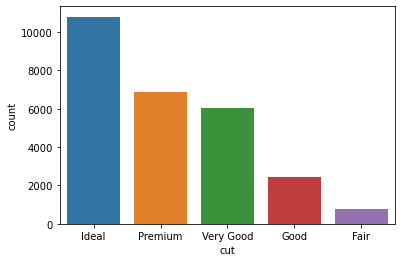

In [27]:
sns.countplot(x='cut', data=df)

<AxesSubplot:xlabel='color', ylabel='count'>

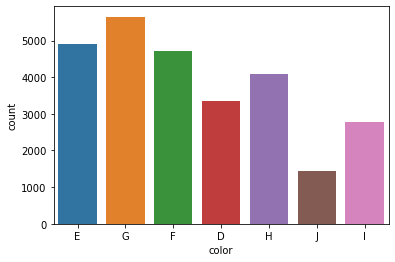

In [28]:
sns.countplot(x='color', data=df)

<AxesSubplot:xlabel='clarity', ylabel='count'>

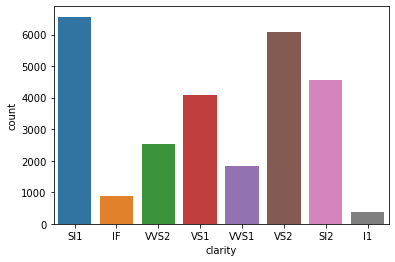

In [29]:
sns.countplot(x='clarity', data=df)

## Visualizing the numerical data

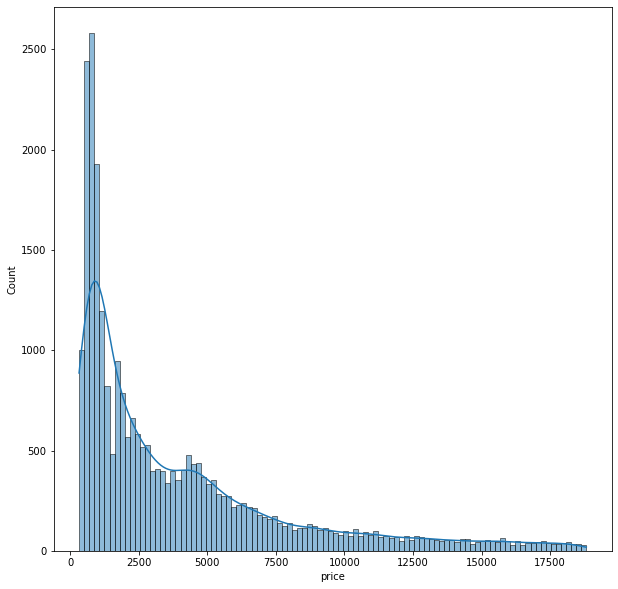

In [30]:
plt.figure(figsize=(10,10))
sns.histplot(data=df, x='price', bins=100, kde=True);

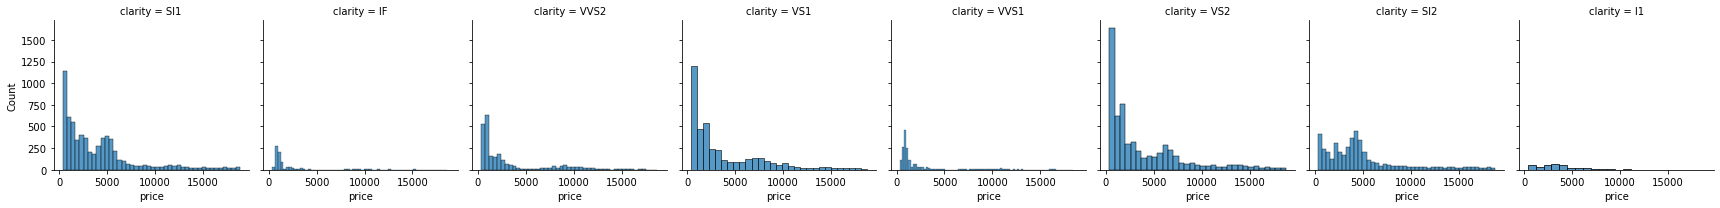

In [31]:
g = sns.FacetGrid(df, col="clarity")
g.map(sns.histplot, "price");

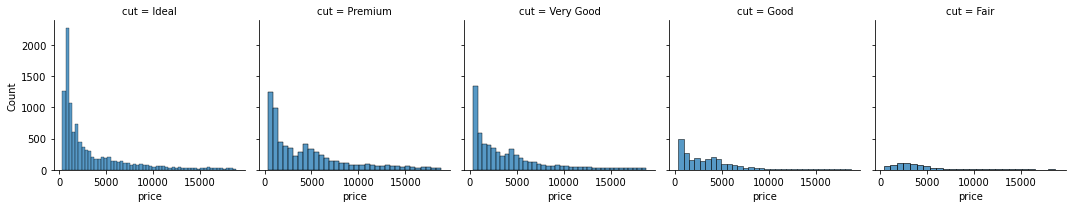

In [32]:
g = sns.FacetGrid(df, col="cut")
g.map(sns.histplot, "price");

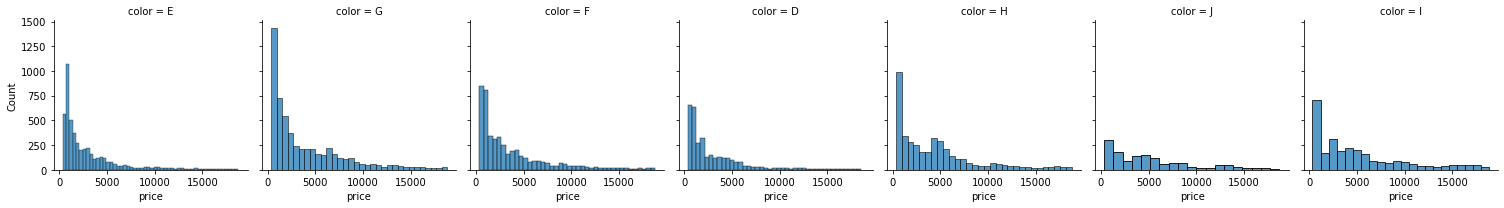

In [33]:
g = sns.FacetGrid(df, col="color")
g.map(sns.histplot, "price");

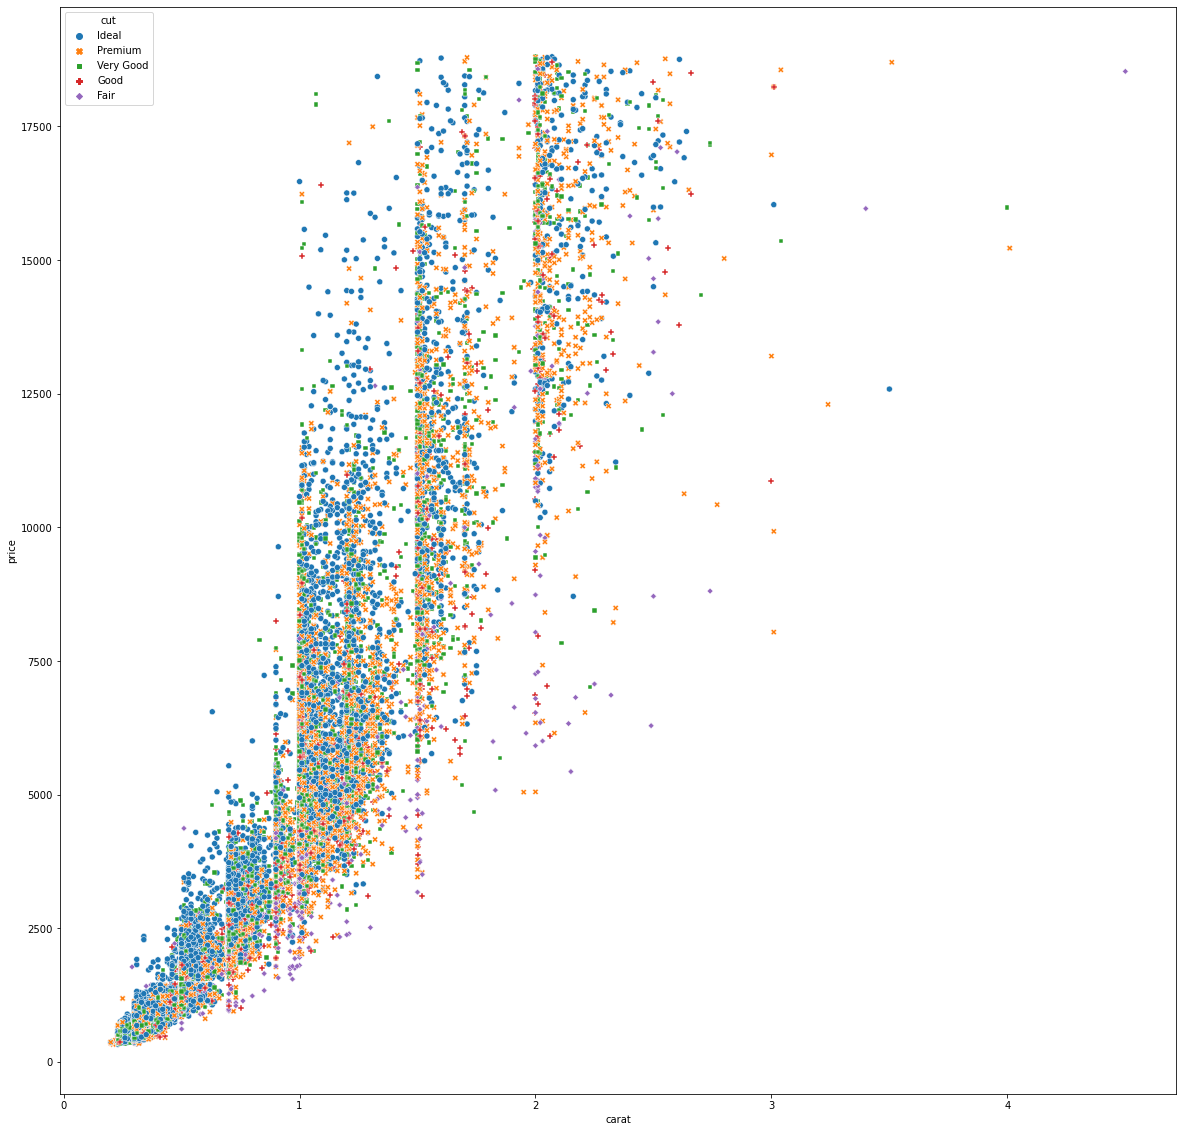

In [34]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=df, x='carat', y='price', hue='cut', style='cut');

## Checking for outliers in our data

<AxesSubplot:xlabel='carat'>

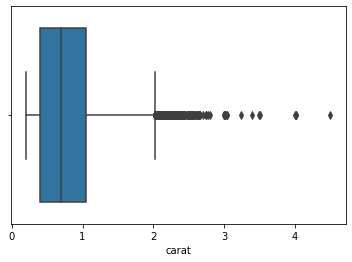

In [35]:
sns.boxplot(x='carat', data=df)

<AxesSubplot:xlabel='depth'>

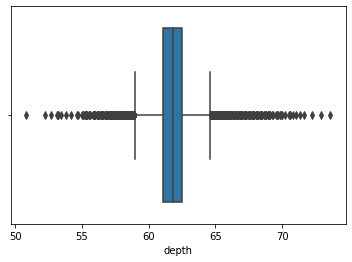

In [36]:
sns.boxplot(x='depth', data=df)

<AxesSubplot:xlabel='table'>

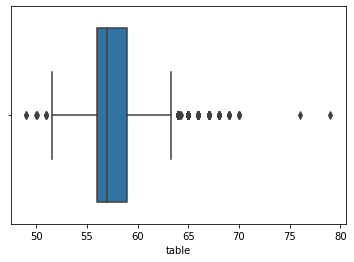

In [37]:
sns.boxplot(x='table', data=df)

<AxesSubplot:xlabel='x'>

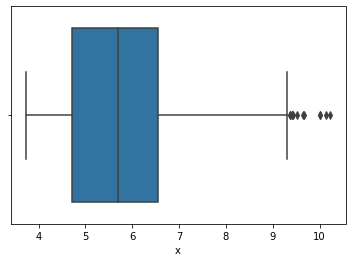

In [38]:
sns.boxplot(x='x', data=df)

<AxesSubplot:xlabel='y'>

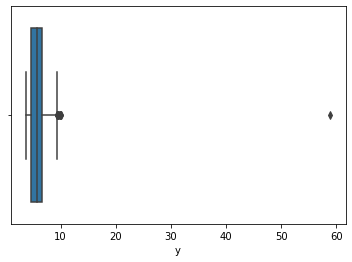

In [39]:
sns.boxplot(x='y', data=df)

<AxesSubplot:xlabel='z'>

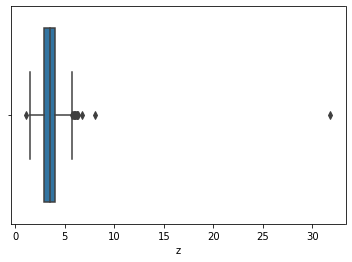

In [40]:
sns.boxplot(x='z', data=df)

<AxesSubplot:xlabel='price'>

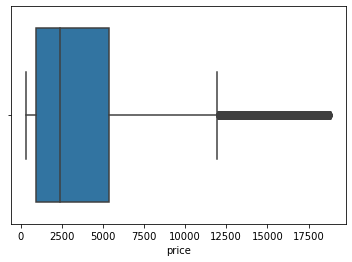

In [41]:
sns.boxplot(x='price', data=df)

## Our data is having outliers in carat, depth, table, x, y, z, price. Lets proceed without outlier treatment.

## Bivariate Analysis

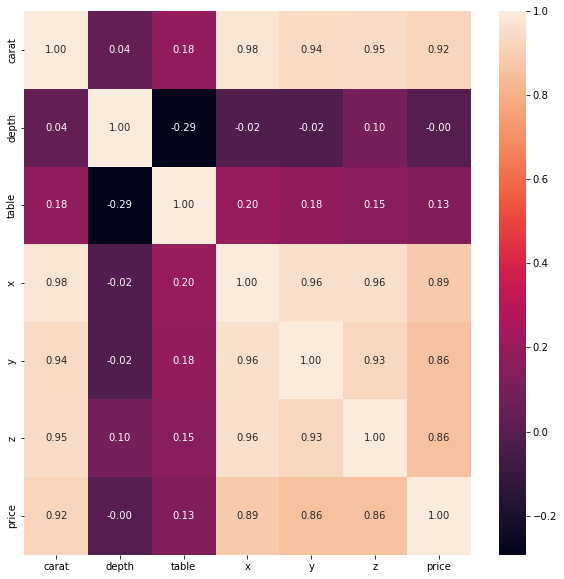

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

From the heatmap,

carat and price are corelated
x, y, z are strongly corelated
x, y, z having corelation with price
It seems depth and table are negative co relation and weak relation with price

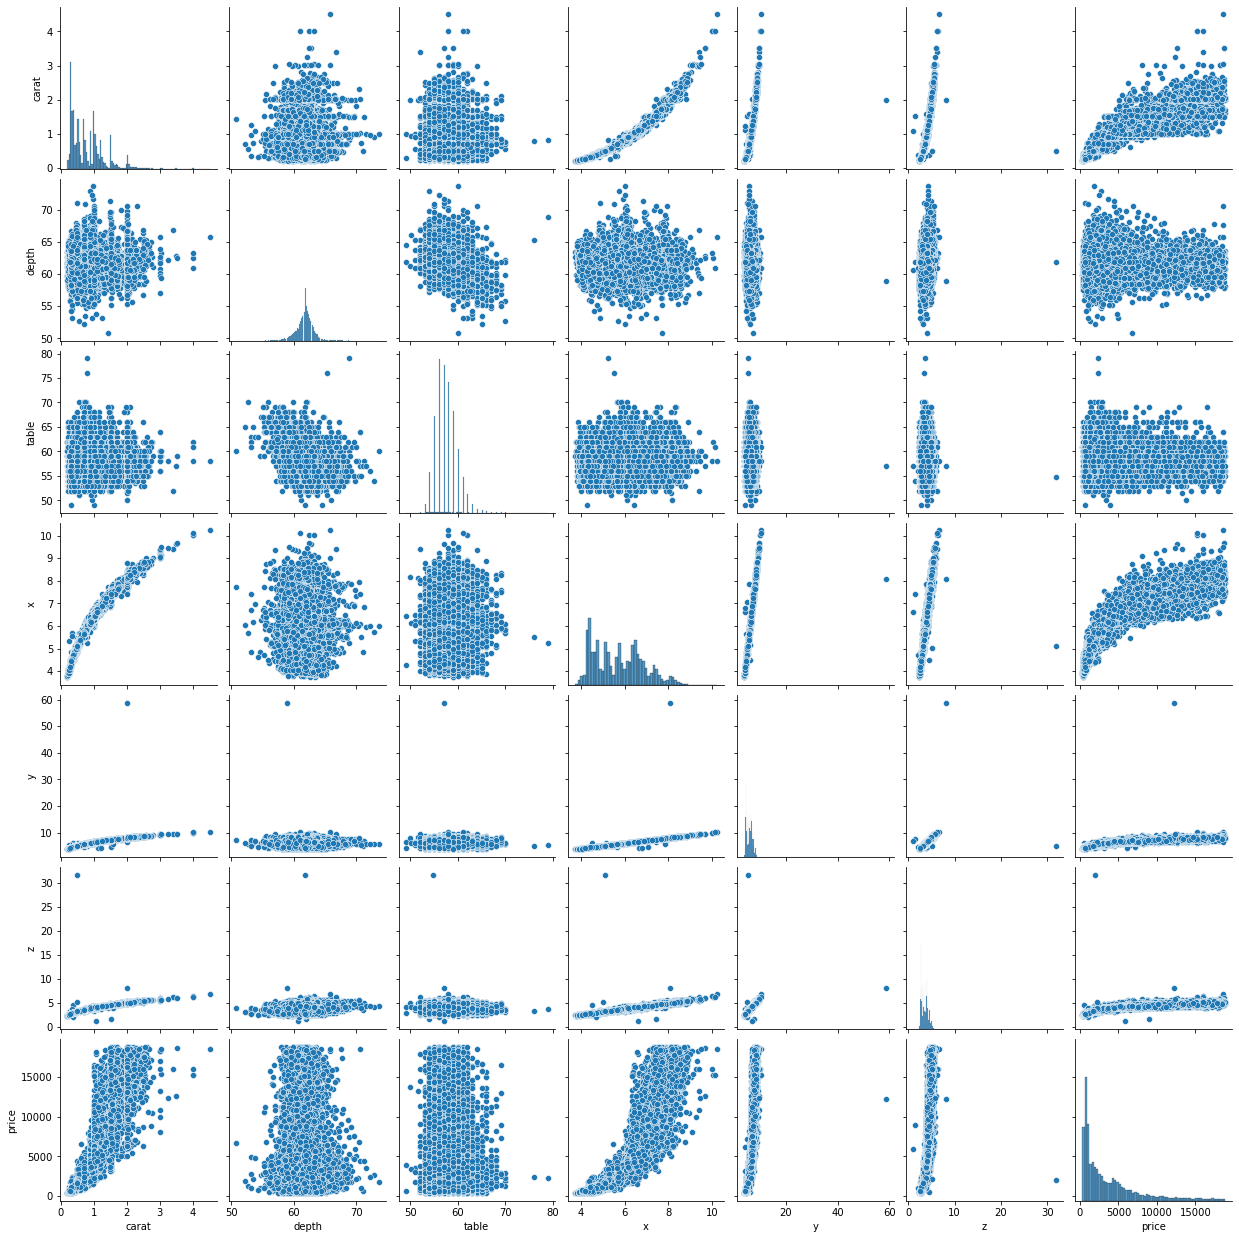

In [43]:
sns.pairplot(df);

## Coding our categorical data

In [44]:
#while coding lets Check for the possibility of combining the sub levels of the ordinal variables and code them accordingly.
df['cut']=np.where(df['cut']=='Ideal','2',df['cut'])
df['cut']=np.where(df['cut']=='Premium','2',df['cut'])
df['cut']=np.where(df['cut']=='Good','1',df['cut'])
df['cut']=np.where(df['cut']=='Very Good','1',df['cut'])
df['cut']=np.where(df['cut']=='Fair','0',df['cut'])

In [45]:
# (In order from Best to Worst in terms of avg price) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1. Clarity with
#higher avg price is taken as best and lower avg. price as worst.
df['clarity']=np.where(df['clarity']=='SI2','Best',df['clarity'])
df['clarity']=np.where(df['clarity']=='SI1','VGood',df['clarity'])
df['clarity']=np.where(df['clarity']=='VS2','VGood',df['clarity'])
df['clarity']=np.where(df['clarity']=='I1','Good',df['clarity'])
df['clarity']=np.where(df['clarity']=='VS1','Good',df['clarity'])
df['clarity']=np.where(df['clarity']=='VVS2','Bad',df['clarity'])
df['clarity']=np.where(df['clarity']=='IF','Bad',df['clarity'])
df['clarity']=np.where(df['clarity']=='VVS1','Worst',df['clarity'])

In [46]:
df.groupby(['clarity'])['price'].mean().sort_values(ascending=True)

clarity
Worst    2502.874388
Bad      3126.694826
Good     3844.387365
VGood    3980.510746
Best     5088.169919
Name: price, dtype: float64

In [47]:
df['clarity']=np.where(df['clarity']=='Best','4',df['clarity'])
df['clarity']=np.where(df['clarity']=='VGood','3',df['clarity'])
df['clarity']=np.where(df['clarity']=='Good','2',df['clarity'])
df['clarity']=np.where(df['clarity']=='Bad','1',df['clarity'])
df['clarity']=np.where(df['clarity']=='Worst','0',df['clarity'])

In [48]:
#Colour of the cubic zirconia.With D being the best and J the worst.
df['color']=np.where(df['color']=='J','Worst',df['color'])
df['color']=np.where(df['color']=='I','Bad',df['color'])
df['color']=np.where(df['color']=='H','Good',df['color'])
df['color']=np.where(df['color']=='G','Good',df['color'])
df['color']=np.where(df['color']=='F','VGood',df['color'])
df['color']=np.where(df['color']=='E','VGood',df['color'])
df['color']=np.where(df['color']=='D','Best',df['color'])

In [49]:
df.color.unique()

array(['VGood', 'Good', 'Best', 'Worst', 'Bad'], dtype=object)

In [50]:
df['color']=np.where(df['color']=='Best','4',df['color'])
df['color']=np.where(df['color']=='VGood','3',df['color'])
df['color']=np.where(df['color']=='Good','2',df['color'])
df['color']=np.where(df['color']=='Bad','1',df['color'])
df['color']=np.where(df['color']=='Worst','0',df['color'])

In [51]:
df.color.unique()

array(['3', '2', '4', '0', '1'], dtype=object)

In [52]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,2,3,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,2,2,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,1,3,1,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,2,3,2,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,2,3,0,60.4,59.0,4.35,4.43,2.65,779


In [53]:
#changing the object data type to int data type
df['cut'] = df['cut'].astype('int64')
df['color'] = df['color'].astype('int64')
df['clarity'] = df['clarity'].astype('int64')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  int64  
 2   color    26925 non-null  int64  
 3   clarity  26925 non-null  int64  
 4   depth    26925 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 3.3 MB


In [55]:
df_dummy = pd.get_dummies(df, columns=['clarity'])

In [56]:
df_dummy.head()

,carat,cut,color,depth,table,x,y,z,price,clarity_0,clarity_1,clarity_2,clarity_3,clarity_4
0,0.30,2,3,62.1,58.0,4.27,4.29,2.66,499,0,0,0,1,0
1,0.33,2,2,60.8,58.0,4.42,4.46,2.70,984,0,1,0,0,0
2,0.90,1,3,62.2,60.0,6.04,6.12,3.78,6289,0,1,0,0,0
3,0.42,2,3,61.6,56.0,4.82,4.80,2.96,1082,0,0,1,0,0
4,0.31,2,3,60.4,59.0,4.35,4.43,2.65,779,1,0,0,0,0


## Spliting data and building model

In [57]:
X=df_dummy.drop('price',axis=1)
Y=df_dummy.pop('price')

In [58]:
# Split X and Y into 70 :30 ratio
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

In [64]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))

In [ ]:
# Lets check the intercept for the model

intercept = model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

In [67]:
# R square on training data = 0.8983930282820286
model.score(X_train, Y_train)

0.8983930282820286

89.7% of the variation in the price is explained by the predictors in the model for train set

In [68]:
# R square on testing data = 0.8993911732787319
model.score(X_test, Y_test)

0.8993911732787319

In [69]:
#RMSE on Training data=1277.6049746707354
predicted_train=model.fit(X_train, Y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(Y_train,predicted_train))

1277.6049746707354

In [70]:
#RMSE on Testing data= 1284.8251437258614
predicted_test=model.fit(X_train, Y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(Y_test,predicted_test))

1284.8251437258614

## Linear Regression using statsmodels

In [71]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, Y_train], axis=1)
data_test=pd.concat([X_test,Y_test],axis=1)
data_train.head()

,carat,cut,color,depth,table,x,y,z,clarity_0,clarity_1,clarity_2,clarity_3,clarity_4,price
5030,1.10,1,3,63.3,56.0,6.53,6.58,4.15,0,0,0,0,1,4065
12108,1.01,1,4,64.0,56.0,6.30,6.38,4.06,0,0,0,0,1,5166
20181,0.67,1,1,60.7,61.4,5.60,5.64,3.41,0,0,0,1,0,1708
4712,0.76,1,2,57.7,63.0,6.05,5.97,3.47,0,0,0,1,0,2447
2548,1.01,2,2,62.8,59.0,6.37,6.34,3.99,0,0,1,0,0,6618


In [72]:
expr= 'price ~ carat+ cut+ color +depth + table+ x+ y+ z+ clarity_0+ clarity_1 + clarity_2+ clarity_3 + clarity_4'

In [73]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept     9268.691856
carat        11318.567897
cut            231.645119
color          524.749786
depth         -124.256214
table          -59.402013
x            -1153.688247
y               16.581106
z              -17.414227
clarity_0     2645.487776
clarity_1     2728.550826
clarity_2     1884.801513
clarity_3     1611.265718
clarity_4      398.586022
dtype: float64

In [74]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                 1.388e+04
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:23:14   Log-Likelihood:            -1.6155e+05
No. Observations:               18847   AIC:                         3.231e+05
Df Residuals:                   18834   BIC:                         3.232e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9268.6919    596.448     15.540      0.0

In [75]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [76]:
#Root Mean Squared Error - RMSE =1277.6049746707322
np.sqrt(mse)

1277.6049746707322

In [77]:
np.sqrt(lm1.mse_resid)

1278.0458263121645

In [ ]:
# Prediction on Test data
Y_pred = lm1.predict(data_test)
plt.scatter(Y_test['price'],Y_pred )
plt.show()

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [85]:
i=0
for column in X.columns:
    if i < 14:
        print (column ,"-->",  vif[i])
        i = i+1

carat --> 25.17695100956055
cut --> 1.2610754399041277
color --> 1.112048313913521
depth --> 1.5574187060120965
table --> 1.3404708330585684
x --> 48.2246184795247
y --> 13.868691518258045
z --> 16.084616640003794
clarity_0 --> 410.49566321967245
clarity_1 --> 763.2657777437544
clarity_2 --> 998.4236588700342
clarity_3 --> 2848.696543688327
clarity_4 --> 1028.4936459173919


In [86]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(9268.69) * Intercept + (11318.57) * carat + (231.65) * cut + (524.75) * color + (-124.26) * depth + (-59.4) * table + (-1153.69) * x + (16.58) * y + (-17.41) * z + (2645.49) * clarity_0 + (2728.55) * clarity_1 + (1884.8) * clarity_2 + (1611.27) * clarity_3 + (398.59) * clarity_4 + 

In [87]:
print('Good day')

Good day
